In [1]:
# KNN Classification
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df=pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
df.shape

(101, 18)

In [6]:
df['type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64

In [7]:
df['type'].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [8]:
df.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
## Changing Animal name to categorical variable
df['animal name'] = df['animal name'].astype('category')

In [10]:
x=df.iloc[:,1:17]
y=df.iloc[:,-1]

In [11]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [12]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [13]:
model = KNeighborsClassifier(n_neighbors = 1)

In [14]:
model.fit(x,y)

KNeighborsClassifier(n_neighbors=1)

In [15]:
kfold=KFold(n_splits=12)
result=cross_val_score(model,x,y,cv=kfold)

In [16]:
result

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.875,
       1.   , 0.75 , 1.   ])

In [17]:
result.mean()

0.96875

In [18]:
model.predict([[0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0]])

C:\AN\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

# Grid search cv

In [19]:
n_neighbors=range(1,20)
parameters=({'n_neighbors':n_neighbors})

In [20]:
model=KNeighborsClassifier()

In [21]:
grid=GridSearchCV(estimator=model,param_grid=parameters)

In [22]:
grid.fit(x,y)

C:\AN\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


# visualizing the cv results

In [24]:
k_range = range(1, 20)
k_scores = []

# use iteration to caclulator different k in models
# then return the average accuracy based on the cross validation

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x,y, cv=5)
    k_scores.append(scores.mean())

C:\AN\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\AN\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\AN\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\AN\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\AN\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\AN\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members

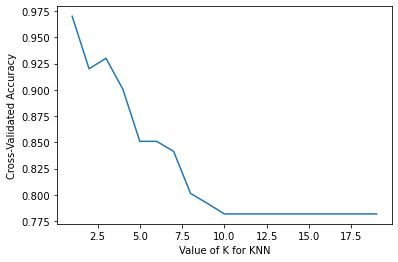

In [25]:
#plt.figure(figsize=(16,6))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
#plt.ylim(0.73,0.76)
plt.show()

In [26]:
k_scores

[0.97,
 0.9199999999999999,
 0.93,
 0.9004761904761904,
 0.8509523809523811,
 0.8509523809523811,
 0.8414285714285714,
 0.8014285714285714,
 0.7919047619047619,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762,
 0.781904761904762]

In [27]:
df_accuracy=pd.DataFrame({'Value of k': range(1,20),
                         'Accuracy': k_scores})

In [28]:
df_accuracy

,Value of k,Accuracy
0,1,0.970000
1,2,0.920000
2,3,0.930000
3,4,0.900476
4,5,0.850952
5,6,0.850952
6,7,0.841429
7,8,0.801429
8,9,0.791905
9,10,0.781905


In [29]:
df_accuracy.sort_values('Accuracy')

,Value of k,Accuracy
9,10,0.781905
16,17,0.781905
15,16,0.781905
14,15,0.781905
13,14,0.781905
12,13,0.781905
11,12,0.781905
10,11,0.781905
17,18,0.781905
18,19,0.781905


In [30]:
#same as up only in descending form
df_accuracy.sort_values('Accuracy',ascending=False)

,Value of k,Accuracy
0,1,0.970000
2,3,0.930000
1,2,0.920000
3,4,0.900476
4,5,0.850952
5,6,0.850952
6,7,0.841429
7,8,0.801429
8,9,0.791905
14,15,0.781905
